# 17 技巧

## 17.1 只出现一次的数字

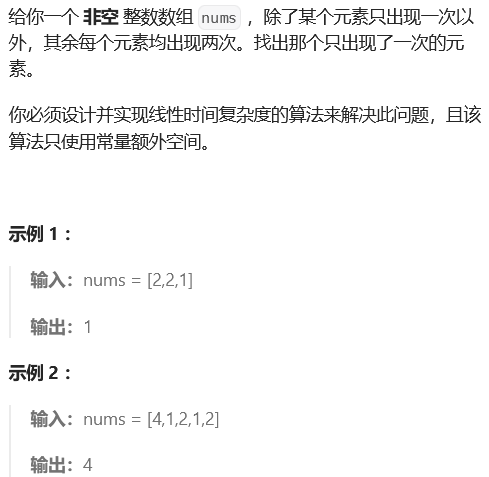

In [ ]:
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        # 初始化结果为0
        result = 0
        # 遍历数组，依次异或每个元素
        for num in nums:
            result ^= num
        return result

## 17.2 多数元素

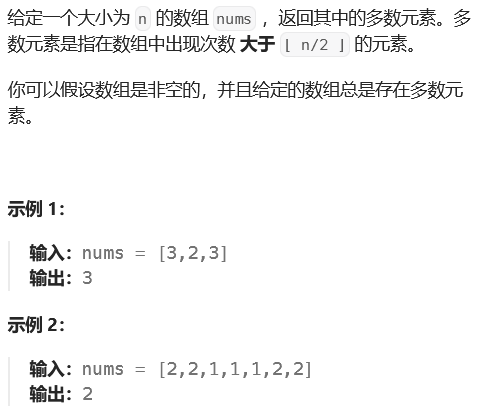

In [ ]:
class Solution:
    def majorityElement(self, nums: List[int]) -> int:
        # 初始化候选元素和计数器（摩尔投票法）
        candidate = None
        count = 0
        
        # 摩尔投票核心逻辑
        for num in nums:
            # 计数器为0时，更新候选元素为当前元素
            if count == 0:
                candidate = num
            # 当前元素等于候选，计数器+1，否则-1
            count += 1 if num == candidate else -1
        
        return candidate

## 17.3 颜色分类

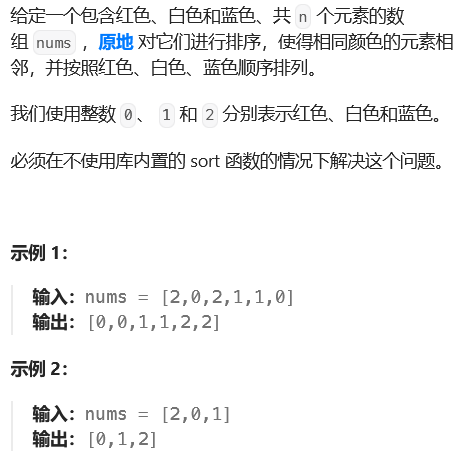

In [ ]:
class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        # 初始化三个指针
        left = 0          # 0的右边界（left左侧全是0）
        current = 0       # 当前遍历指针
        right = len(nums) - 1  # 2的左边界（right右侧全是2）
        
        # 一趟扫描，current超过right时终止
        while current <= right:
            if nums[current] == 0:
                # 交换current和left位置的元素，扩展0的边界
                nums[current], nums[left] = nums[left], nums[current]
                left += 1
                current += 1
            elif nums[current] == 1:
                # 1在中间，无需交换，直接移动current
                current += 1
            else:  # nums[current] == 2
                # 交换current和right位置的元素，扩展2的边界
                nums[current], nums[right] = nums[right], nums[current]
                right -= 1
                # 注意：current不移动，因为交换过来的元素可能是0或1，需要重新检查

## 17.4 下一个排列

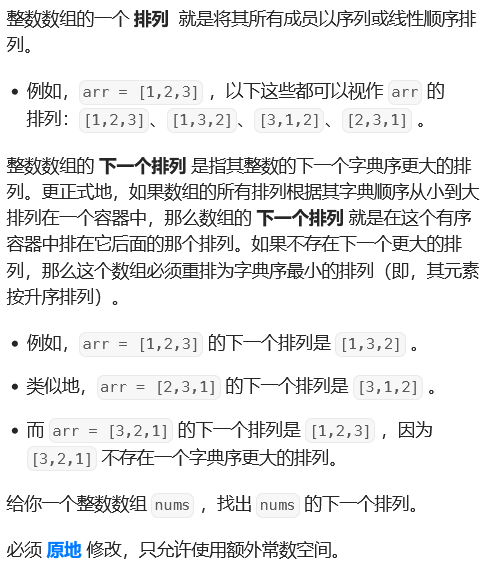

In [ ]:
class Solution:
    def nextPermutation(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        n = len(nums)
        # 步骤1：从后向前找第一个升序对 nums[i] < nums[i+1]
        i = n - 2
        while i >= 0 and nums[i] >= nums[i+1]:
            i -= 1
        
        # 如果找到升序对
        if i >= 0:
            # 步骤2：从后向前找第一个大于 nums[i] 的数 nums[j]
            j = n - 1
            while nums[j] <= nums[i]:
                j -= 1
            # 步骤3：交换 nums[i] 和 nums[j]
            nums[i], nums[j] = nums[j], nums[i]
        
        # 步骤4：反转 i+1 到末尾的元素（无论是否找到i，都要执行：没找到则反转整个数组）
        left, right = i + 1, n - 1
        while left < right:
            nums[left], nums[right] = nums[right], nums[left]
            left += 1
            right -= 1

## 17.5 寻找重复数

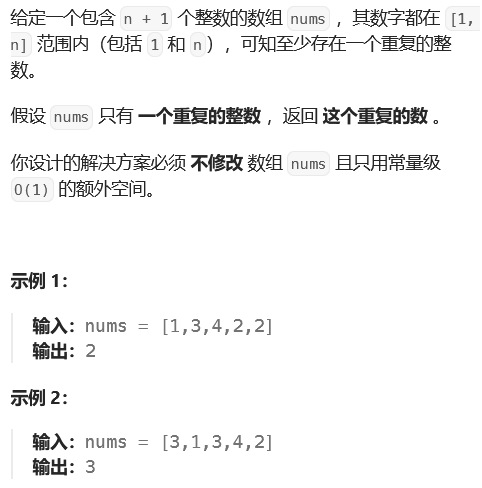

class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        # 步骤1：快慢指针找相遇点
        slow = nums[0]
        fast = nums[0]
        # 先移动一次，避免初始值相同直接退出
        while True:
            slow = nums[slow]       # 慢指针走1步
            fast = nums[nums[fast]] # 快指针走2步
            if slow == fast:
                break
        
        # 步骤2：找环的入口（重复数）
        slow = nums[0]  # 慢指针重置到起点
        while slow != fast:
            slow = nums[slow]  # 快慢指针都走1步
            fast = nums[fast]
        
        return slow